<a href="https://colab.research.google.com/github/A01793509/Equipo38/blob/main/MNA_IAyAA_semana_8_Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 8**
###**Máquina de Vector Soporte - Support Vector Machine(SVM)**


**Nombres y matrículas de los integrantes del equipo:**

*   Alberto Jose Garcia Porras (A01793509)
*   Carlos Julio León Caicedo (A01793947)
*   Luis Fernando Ríos Piedra (A00453954)
*   Marco Antonio Vázquez Morales (A01793704)

En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [99]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
#***** Ejercicio 1 *********
import pandas as pd
from sklearn.model_selection import train_test_split

#***** Ejercicio 2 *********
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#***** Ejercicio 3 *********
from sklearn.dummy import DummyClassifier
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

#***** Ejercicio 4 *********
from sklearn import svm
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

#***** Ejercicio 5 *********
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
import seaborn as sns


#**Ejercicio-1.** 

There are 6 numerical and 8 categorical attributes. The labels have been changed for the convenience of the statistical algorithms. For example, attribute 4 originally had 3 labels p,g,gg and these have been changed to labels 1,2,3.

A1: 0,1 CATEGORICAL (formerly: a,b)

A2: continuous.

A3: continuous.

A4: 1,2,3 CATEGORICAL (formerly: p,g,gg)

A5: 1, 2,3,4,5, 6,7,8,9,10,11,12,13,14 CATEGORICAL (formerly: ff,d,i,k,j,aa,m,c,w, e, q, r,cc, x)

A6: 1, 2,3, 4,5,6,7,8,9 CATEGORICAL (formerly: ff,dd,j,bb,v,n,o,h,z)

A7: continuous.

A8: 1, 0 CATEGORICAL (formerly: t, f)

A9: 1, 0 CATEGORICAL (formerly: t, f)

A10: continuous.

A11: 1, 0 CATEGORICAL (formerly t, f)

A12: 1, 2, 3 CATEGORICAL (formerly: s, g, p)

A13: continuous.

A14: continuous.

A15: 1,2 class attribute (formerly: +,-)

In [20]:
#Lectura del archivo desde la fuente UCI original
nombre_columnas=["A1","A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15"]

path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat'
df = pd.read_csv(path, sep=' ', names=nombre_columnas)

df.index.name = None

df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [32]:
X=df.drop('A15',axis=1)
Y=df['A15']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size=0.85, random_state=0)

Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 242 to 684
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      586 non-null    int64  
 1   A2      586 non-null    float64
 2   A3      586 non-null    float64
 3   A4      586 non-null    int64  
 4   A5      586 non-null    int64  
 5   A6      586 non-null    int64  
 6   A7      586 non-null    float64
 7   A8      586 non-null    int64  
 8   A9      586 non-null    int64  
 9   A10     586 non-null    int64  
 10  A11     586 non-null    int64  
 11  A12     586 non-null    int64  
 12  A13     586 non-null    int64  
 13  A14     586 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 68.7 KB


#**Ejercicio-2.**

In [41]:
#Validamos los rangos minimo y máximo de los atributos numéricos
XNumericas=["A2", "A3", "A7", "A10", "A13", "A14"]

Xtrain[XNumericas].describe()

,A2,A3,A7,A10,A13,A14
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,31.672031,4.780213,2.329480,2.448805,181.156997,984.906143
std,11.871198,5.009088,3.484635,5.029310,175.276941,5358.882002
min,13.750000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,22.670000,1.000000,0.165000,0.000000,70.750000,1.000000
50%,28.710000,2.812500,1.000000,0.000000,157.000000,5.000000
75%,38.250000,7.500000,2.947500,3.000000,266.000000,351.750000
max,80.250000,28.000000,28.500000,67.000000,2000.000000,100001.000000


Determinamos que sí es necesario escalar los atributos numéricos dada la diferencia en el máximo de A14 comparándola con el resto de columnas. Aplicaremos MinMaxScaler().

In [42]:
#Validamos los rangos minimo y máximo de los atributos numéricos
XCategoricas=["A1","A4", "A5", "A6", "A8", "A9","A11", "A12"]

Xtrain[XCategoricas].describe()

,A1,A4,A5,A6,A8,A9,A11,A12
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,0.682594,1.767918,7.257679,4.609215,0.537543,0.426621,0.462457,1.924915
std,0.465865,0.430537,3.696635,1.955711,0.499015,0.495009,0.499015,0.300132
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,2.000000
50%,1.000000,2.000000,8.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,2.000000,9.750000,5.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,3.000000,14.000000,9.000000,1.000000,1.000000,1.000000,3.000000


In [44]:
#Validamos los rangos minimo y máximo de los atributos numéricos
XBinarias = ["A15"]

Ytrain.describe()

count    586.000000
mean       0.445392
std        0.497434
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: A15, dtype: float64

In [48]:
#**********************************************************************************************************************************************************************
#Creamos los pipelines para la imputación, la transformación (escalar) de las variables numéricas y para la transformación One-hot de las variables
#categóricas y binarias:
#**********************************************************************************************************************************************************************
#Creamos el pipeline para las numéricas con la imputación utilizando la media y el minmax para escalar los datos numéricos a un rango equiparable
pipeline_numericas = Pipeline(steps = [('impMedia', SimpleImputer(strategy='mean')), ('scalar', MinMaxScaler(feature_range=(1,2)))])

#Creamos el pipeline para las categóricas con la imputación utilizando la moda y aplicando la transformación One-Hot
pipeline_categoricas = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')), ('OneHotE', OneHotEncoder(drop='first', handle_unknown='ignore'))])

Columnas_Transformar = ColumnTransformer(transformers=[('numericas', pipeline_numericas,XNumericas), ('categoricas', pipeline_categoricas, XCategoricas)], 
                                                     remainder='passthrough')

#**Ejercicio-3.**

In [52]:
modeloDummy = DummyClassifier(strategy="stratified")

XtrainFit_d = Columnas_Transformar.fit(Xtrain)   
XtrainTransf_d = XtrainFit_d.transform(Xtrain) 

modeloDummy=modeloDummy.fit(XtrainTransf_d, Ytrain)

XvalTransf_d = XtrainFit_d.transform(Xtest)
yhat = modeloDummy.predict(XvalTransf_d)

print('Valor de ACCURACY a superar: %.4f' % np.mean(accuracy_score(Ytest,yhat)))
print("Valor del F1-SCORE a superar: %.4f" % np.mean(f1_score(Ytest,yhat)))
print("Valor del PRECISION a superar: %.4f" % np.mean(precision_score(Ytest,yhat)))
print("Valor del RECALL a superar: %.4f" % np.mean(recall_score(Ytest,yhat)))

Valor de ACCURACY a superar: 0.4712
Valor del F1-SCORE a superar: 0.4330
Valor del PRECISION a superar: 0.4118
Valor del RECALL a superar: 0.4565


¿Por qué consideras que es adecuado usar la estrategia “stratified” en este caso?

#**Ejercicio-4.**

In [80]:
#Máquina de vector soporte (SVM) - mejores hiperparámetros con una búsqueda de malla y validación cruzada y los scores del ejercicio 3”
XtrainTf = Columnas_Transformar.fit(Xtrain)
XtrainFTf = XtrainTf.transform(Xtrain)   
XtestFTf = XtrainTf.transform(Xtest)

Mod_SVM=svm.SVC()

Mod_SVM.fit(XtrainFTf,Ytrain)

kernel = ['linear', 'poly', 'rbf', 'sigmoid']
#kernel = ['precomputed']
C = [0.1, 10, 100, 1000]
degree=[2, 3, 5]
gamma= ['scale', 'auto']

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
grid_model_SVM = GridSearchCV(Mod_SVM,param_grid={'C':C,'kernel':kernel,'degree':degree, 'gamma':gamma},cv=cv,scoring='accuracy')

grid_model_SVM.fit(XtrainFTf,Ytrain)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=SVC(),
             param_grid={'C': [0.1, 10, 100, 1000], 'degree': [2, 3, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [81]:
print("Los mejores hiperparámetros del modelo SVM son:", grid_model_SVM.best_params_)
print("Modelo SVM después de ajustes:", grid_model_SVM.best_estimator_)

Los mejores hiperparámetros del modelo SVM son: {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Modelo SVM después de ajustes: SVC(C=10, kernel='poly')


In [87]:
grid_predicciones = grid_model_SVM.predict(XtestFTf)

print("Errores indicados en el punto 3:")
print('Valor de ACCURACY a superar: %.4f' % np.mean(accuracy_score(Ytest,grid_predicciones)))
print("Valor del F1-SCORE a superar: %.4f" % np.mean(f1_score(Ytest,grid_predicciones)))
print("Valor del PRECISION a superar: %.4f" % np.mean(precision_score(Ytest,grid_predicciones)))
print("Valor del RECALL a superar: %.4f" % np.mean(recall_score(Ytest,grid_predicciones)))

Errores indicados en el punto 3:
Valor de ACCURACY a superar: 0.8750
Valor del F1-SCORE a superar: 0.8506
Valor del PRECISION a superar: 0.9024
Valor del RECALL a superar: 0.8043


#**Ejercicio-5.**

In [98]:
#Definimos los K pliegues que utilizaremos en nuestra validación cruzada, en este caso, 5 divisiones y 3 repeticiones
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
#Creamos nuestro pipeline con los pasos de transformación y ejecución de los modelos
Mod_SVM_Best=svm.SVC(C=10, degree= 3, gamma='scale', kernel= 'poly')

pipeline = Pipeline(steps=[("ct", Columnas_Transformar), ("m", Mod_SVM_Best)])

#Almacenamos las métricas a utilizar en la lista 'mismetricas' y llamamos las funciones de métricas creadas previamente
mismetricas = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score),
    "recall": make_scorer(recall_score),
    "f1score": make_scorer(f1_score)
}

#Ejecutamos la validación cruzada y almacenamos el resultado en la variable 'resultadosOU'
resultadosOU = cross_validate(pipeline, Xtrain, Ytrain, scoring=mismetricas, cv=kfold,  
                                return_train_score=True
                                )

#print("Métricas de %s para los datos de entrenamiento:" %nombres[i])
print("\nmean Accuracy: %.3f \nmean Precision: %.3f \nmean Recall: %.3f \nmean f1score: %.3f \n" % (
                                               np.mean(resultadosOU["train_accuracy"]),
                                               np.mean(resultadosOU["train_precision"]),
                                               np.mean(resultadosOU["train_recall"]),
                                              np.mean(resultadosOU["train_f1score"])
  ))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  UserWarning,



mean Accuracy: 0.945 
mean Precision: 0.934 
mean Recall: 0.943 
mean f1score: 0.939 



/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


In [117]:
Resultados_BOXPLOT=pd.DataFrame(resultadosOU)
Resultados_BOXPLOT.drop(columns=["fit_time","score_time", "train_accuracy", "train_precision", "train_recall", "train_f1score"], inplace=True)

Resultados_BOXPLOT.shape
Resultados_Array=Resultados_BOXPLOT
Resultados_Array

,test_accuracy,test_precision,test_recall,test_f1score
0,0.881356,0.882353,0.849057,0.865385
1,0.820513,0.792453,0.807692,0.800000
2,0.837607,0.811321,0.826923,0.819048
3,0.837607,0.770492,0.903846,0.831858
4,0.846154,0.826923,0.826923,0.826923
5,0.796610,0.784314,0.754717,0.769231
6,0.829060,0.775862,0.865385,0.818182
7,0.897436,0.884615,0.884615,0.884615
8,0.846154,0.826923,0.826923,0.826923
9,0.829060,0.807692,0.807692,0.807692


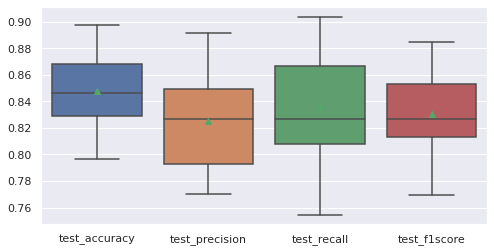

In [126]:
#Se generan los boxplots de las métricas calculadas
sns.set(rc={'figure.figsize':(8,4)})
sns.boxplot(data=Resultados_BOXPLOT, showmeans=True)
plt.show()

Incluye tus conclusiones.

#**Ejercicio-6.**

In [ ]:
None

#**Ejercicio-7.**

In [ ]:
None

#**Ejercicio-8.**

In [ ]:
None

#**Ejercicio-9.**

In [ ]:
None

#**Ejercicio-10.**

In [ ]:
None

###**Fin de la Actividad de la semana 8.**